In [19]:
# Format of the output data
# PID Priority State rtime wtime nrun q0 q1 q2 q3 q4

In [20]:
total_ticks = 0
graph_data = dict(list(tuple()))

In [21]:
with open("./50_op.txt", "r") as f:
    file_data = f.readlines()

    for data_line in file_data:

        if "PID" in data_line:
            # Proc Dump Table Header
            total_ticks += 1
            continue

        line_cols = data_line.split()
        if len(line_cols) == 0:
            # Empty Line
            continue

        queue_num = int(line_cols[1])
        pid = int(line_cols[0])

        if pid not in graph_data:
            graph_data[pid] = list()

        if queue_num > -1:
            graph_data[pid].append((total_ticks, queue_num))

        # if total_ticks > 1000:
            # break

In [22]:
from matplotlib import pyplot as plt

In [23]:
colors = [ "white", "black", "silver", "rosybrown", "brown", "red", "salmon",
        "yellowgreen", "green", "darkgreen",
        "aquamarine", "darkslategrey", "darkslateblue", "gold", "bisque" ]

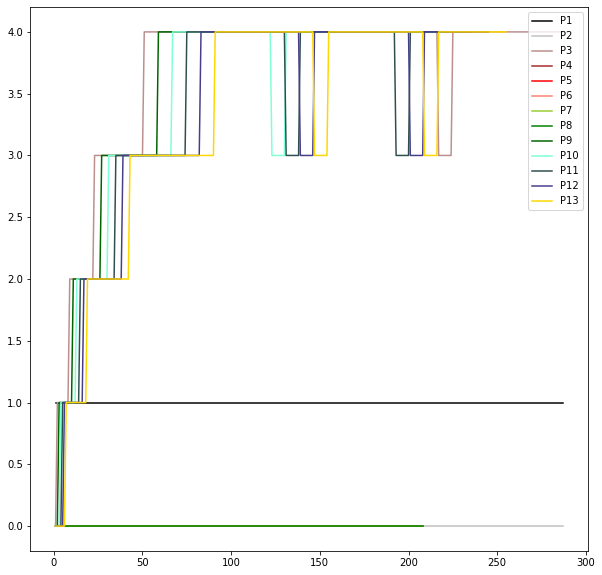

In [24]:
legends = list()
plt.figure(figsize=(10,10))
for pid in graph_data:
    x_cords = [x[0] for x in graph_data[pid]]
    y_cords = [x[1] for x in graph_data[pid]]
    plt.plot(x_cords, y_cords, colors[pid])
    legends.append(f"P{pid}")
plt.legend(legends, loc="upper right")
plt.savefig("./50_output.png")
plt.show()